DISTRICT:
 - Tipo de dato
 - Cantidad de nulos
 - Cantidad de Vacios
 - Cantidad de datos unicos
 - Cantidad de datos totales

In [1]:
import pandas as pd

# Cargar únicamente la columna 'city' del archivo CSV

file_path = "../0_Dataset/Listings.csv"
data = pd.read_csv(file_path, usecols=['district'], delimiter=',', encoding='latin-1')
# Verificar si la columna 'city' existe en el DataFrame
if 'district' in data.columns:
    # Tipo de dato
    tipo_dato = data['district'].dtype
    
    # Cantidad de nulos
    cantidad_nulos = data['district'].isna().sum()
    
    # Cantidad de vacíos (considerando cadenas vacías)
    cantidad_vacios = (data['district'] == '').sum()
    
    # Cantidad de datos únicos
    cantidad_unicos = data['district'].nunique()
    
    # Cantidad de datos totales
    cantidad_totales = data['district'].shape[0]
    
    # Imprimir resultados
    print(f"Columna 'district':")
    print(f" - Tipo de dato: {tipo_dato}")
    print(f" - Cantidad de nulos: {cantidad_nulos}")
    print(f" - Cantidad de vacíos: {cantidad_vacios}")
    print(f" - Cantidad de datos únicos: {cantidad_unicos}")
    print(f" - Cantidad de datos totales: {cantidad_totales}")
else:
    print("La columna 'district' no existe en el DataFrame.")

Columna 'district':
 - Tipo de dato: object
 - Cantidad de nulos: 242700
 - Cantidad de vacíos: 0
 - Cantidad de datos únicos: 5
 - Cantidad de datos totales: 279712


C:\Users\mby30\AppData\Local\Temp\ipykernel_22244\988757360.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, usecols=['district'], delimiter=',', encoding='latin-1')


Obtener Frecuencia Absoluta, Frecuencia Relativa y la Moda


In [4]:
if 'district' in data.columns: 
    # Moda
    moda = data['district'].mode()[0]
    
    # Cantidad por variable
    cantidad_por_variable = data['district'].value_counts()
    
    # CORRECCIÓN: Usar sum() de los valores de esta columna
    total_district = cantidad_por_variable.sum()  # Suma solo los valores de 'district'
    porcentaje_por_variable = (cantidad_por_variable / total_district) * 100
    
    # Imprimir resultados
    print(f"Columna 'district':")
    print(f" - Moda: {moda}\n")
    print(" - Cantidad por variable:")
    for valor, cantidad in cantidad_por_variable.items():
        print(f"   {valor}: {cantidad:,}")  # Formato con separadores de miles
    print("\n - Porcentaje por variable (calculado correctamente):")
    for valor, porcentaje in porcentaje_por_variable.items():
        print(f"   {valor}: {porcentaje:.2f}%")
else:
    print("La columna 'district' no existe en el DataFrame.")

Columna 'district':
 - Moda: Manhattan

 - Cantidad por variable:
   Manhattan: 16,553
   Brooklyn: 14,474
   Queens: 4,704
   Bronx: 992
   Staten Island: 289

 - Porcentaje por variable (calculado correctamente):
   Manhattan: 44.72%
   Brooklyn: 39.11%
   Queens: 12.71%
   Bronx: 2.68%
   Staten Island: 0.78%


Visualizacion

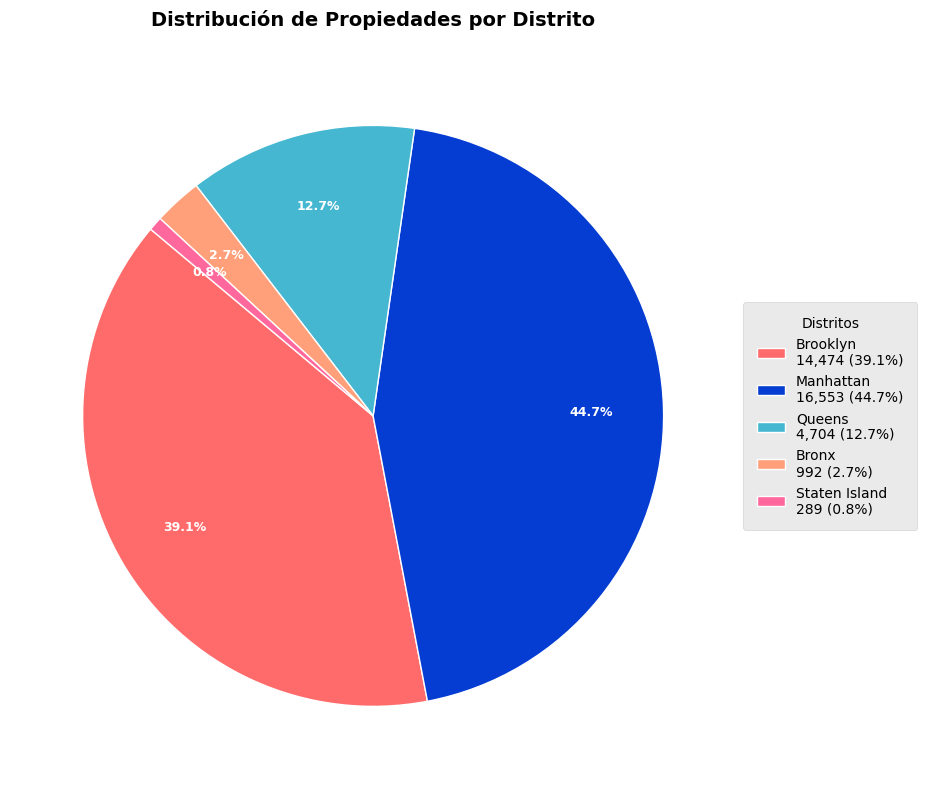

In [9]:
import matplotlib.pyplot as plt

# Datos
distritos = ['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island']
cantidades = [14474, 16553, 4704, 992, 289]
porcentajes = [p/sum(cantidades)*100 for p in cantidades]  # Calculamos porcentajes reales

# Configuración mejorada
plt.style.use('ggplot')
plt.rcParams['font.size'] = 10

# Colores ajustados (nuevo color morado para Staten Island)
colors = ['#FF6B6B', "#053CD2", '#45B7D1', '#FFA07A', '#FF689D'] 

# Crear figura
fig, ax = plt.subplots(figsize=(12, 8))

# Gráfico de torta - mostrando TODOS los porcentajes
wedges, texts, autotexts = plt.pie(
    cantidades,
    colors=colors,
    startangle=140,
    autopct=lambda p: f'{p:.1f}%',  # Mostrar todos los porcentajes
    pctdistance=0.75,  # Más cerca del centro para porciones pequeñas
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 9, 'color': 'white', 'weight': 'bold'}  # Texto en blanco y negrita
)

# Asegurar que el porcentaje de Staten Island sea visible
plt.setp(autotexts[-1], color='white')  # Cambiar color del texto para Staten Island

# Leyenda detallada a la derecha
legend_labels = [f"{d}\n{c:,} ({p:.1f}%)" for d, c, p in zip(distritos, cantidades, porcentajes)]
ax.legend(
    wedges,
    legend_labels,
    title="Distritos",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=True,
    borderpad=1
)

# Título
plt.title('Distribución de Propiedades por Distrito', 
          fontsize=14, pad=20, fontweight='bold')

# Ajustar espacio
plt.tight_layout()
plt.subplots_adjust(right=0.7)  # Más espacio para leyenda

plt.show()